# Retrieve the human-mouse orthologous genes and canonical transcripts  
This script generates H2M Database. 

**Author**: Kexin Dong  
**Date**: Apr 9, 2024    

# 0. Import packages  

In [2]:
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/opt/miniconda3/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
def label_numbers(numbers):
    last_number = None
    count = 0
    labeled_numbers = []

    for num in numbers:
        if num == last_number:
            count += 1
        else:
            count = 1
        last_number = num
        labeled_numbers.append(count)

    return labeled_numbers


def get_label(h,x):
    return f"{h}-M{x:02}"

# 1. Generate input data of H2M from downloaded raw data  

### (1) AACR-GENIE  
Downloaded from Synapse (https://www.synapse.org/#!Synapse:syn53210170)  

In [3]:
path_aacr = '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/AACR-GENIE/v15.0/data_mutations_extended.txt'
df = h2m.cbio_reader(path_aacr, keep=True)
df = pd.DataFrame(df[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h']].value_counts()).reset_index(drop=False)
# count frequencies
len(df) #851088

851088

In [4]:
df['ID'] = [f"AACR-H{(x+1):07}" for x in list(range(len(df)))]

In [46]:
# df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_original.csv',index=False)

In [9]:
df = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_original.csv')

#### Manually check gene symbols and add-ons  

Histone proteins, G protein-coupled receptors, 
NO MOUSE ORTHOLOG: GPR32, RPL21P4 (pseudogene), hcg4p8 (pseudogene), CLTCL1, IFIT1P1 (pseudogene), Prkacg, segments of the T-cell receptor alpha joining (TRAJ) gene TRAJ59.  TCRs. 

In [35]:
df_catalog = pd.read_csv('/Users/kexindong/Desktop/Supp_Table_1_Homo_Genes_manually_updated.csv')

In [10]:
dict_of_aacr_symbol = {
    'H3F3A':'H3-3A',
    'H3F3B':'H3-3B',
    'WHSC1':'NSD1',
    'GPR124':'ADGRA2',
    'MKL1':'MRTFA',
    'PARK2':'PRKN',
    'MRE11A':'MRE11',
    'MLLT4':'AFDN',
    'CASC5': 'KNL1',
    'MEF2BNB-MEF2B':'BORCS8-MEF2B',
    'PAK7':'PAK5',
    'HIST1H1C':'H1-2',
    'HIST1H3B': 'H3C1',
    'HIST1H1E': 'H1-4',
    'HIST1H2BD': 'H2BC5',
    'HIST3H3': 'H3-4',
    'HIST1H3D': 'H3C2',
    'HIST1H3E': 'H3C3',
    'HIST1H3J': 'H3C12',
    'HIST1H2BK': 'H2BC8',
    'HIST1H3F': 'H3C4',
    'HIST1H1B': 'H1-5',
    'HIST1H1D': 'H1-3',
    'HIST1H2AC': 'H2AC1',
    'HIST1H2BJ': 'H2BC13',
    'HIST1H4E': 'H4C5',
    'FAM46C':'TENT5C',
    'WHSC1L1':'NSD3',
    'SETD8':'KMT5A',
    'LPHN3':'ADGRL3',
    'BAI3':'ADGRB3',
    'SEPT9':'NAPB',
    'BRE':'BABAM2',
    'RFWD2':'COP1',
    'TCEB1':'ELOC',
    'GBA':'GBA1',
    'PVRL4':'NECTIN4',
    'ICK':'GCKR',
    'GNB2L1':'RACK1',
    'MGEA5':'OGA',
    'DIRC2':'SLC49A4',
    'LARGE':'LARGE1',
    'TMEM173B':'STING1',
    'SEPT5':'SEPTIN5'
    }

In [ ]:
df_catalog['gene_name_h'] =  [dict_of_aacr_symbol.get(x,x) for x in df_catalog['gene_name_h']]
df_catalog['gene_id_h_37'] = [h2m.dict_tx_h[x][0] for x in df_catalog['gene_name_h']] 
df_catalog['gene_id_h_37'] = [np.nan if x is None else x for x in df_catalog['gene_id_h_37']]
df_catalog.to_csv('/Users/kexindong/Desktop/Supp_Table_1_Homo_Genes_manually_updated.csv')

In [11]:
df['gene_name_h'] = [dict_of_aacr_symbol.get(x,x) for x in df['gene_name_h']]

In [12]:
df, df_wrong = h2m.query_batch(df)
df

There were rows that could not be processed.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count,ID,gene_name_m
0,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1a
1,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1b
2,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1a
3,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1b
4,ABCB1,ENST00000265724.3,87133531,87133531,A,T,SNP,1,AACR-H0260329,Abcb1a
...,...,...,...,...,...,...,...,...,...,...
926619,ZSWIM4,ENST00000254323.2,13923972,13923972,G,A,SNP,1,AACR-H0384705,Zswim4
926620,ZSWIM4,ENST00000254323.2,13928736,13928736,T,C,SNP,1,AACR-H0384706,Zswim4
926621,ZSWIM4,ENST00000254323.2,13928772,13928772,G,T,SNP,1,AACR-H0384707,Zswim4
926622,ZSWIM4,ENST00000254323.2,13930268,13930268,C,T,SNP,1,AACR-H0384708,Zswim4


In [13]:
l_1 = len(df['gene_name_h'].unique())
f'AACR-GENIE # genes mapped with mouse orthologs: {l_1}'

'AACR-GENIE # genes mapped with mouse orthologs: 1477'

In [14]:
l_2 = len(df_wrong['gene_name_h'].unique())
f'AACR-GENIE # genes mapped with mouse orthologs: {l_2}'

'AACR-GENIE # genes mapped with mouse orthologs: 154'

In [50]:
df = pd.DataFrame(set_unmapped)

In [16]:
set_mapped = set(df['gene_name_h'].unique())
set_unmapped = set(df_wrong['gene_name_h'].unique())

In [ ]:
df_catalog['gene_name_h'] =  [dict_of_aacr_symbol.get(x,x) for x in df_catalog['gene_name_h']]

In [8]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_without_homo_gene.csv',index=False)
# df_wrong = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_without_homo_gene.csv')

In [39]:
df,df_wrong = h2m.get_tx_batch(df, species='m')
df

No error occurs.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count,ID,gene_name_m,tx_id_m
0,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1a,ENSMUST00000047753.5
1,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1b,ENSMUST00000009058.10
2,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1a,ENSMUST00000047753.5
3,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1b,ENSMUST00000009058.10
4,ABCB1,ENST00000265724.3,87133531,87133531,A,T,SNP,1,AACR-H0260329,Abcb1a,ENSMUST00000047753.5
...,...,...,...,...,...,...,...,...,...,...,...
926619,ZSWIM4,ENST00000254323.2,13923972,13923972,G,A,SNP,1,AACR-H0384705,Zswim4,ENSMUST00000039480.7
926620,ZSWIM4,ENST00000254323.2,13928736,13928736,T,C,SNP,1,AACR-H0384706,Zswim4,ENSMUST00000039480.7
926621,ZSWIM4,ENST00000254323.2,13928772,13928772,G,T,SNP,1,AACR-H0384707,Zswim4,ENSMUST00000039480.7
926622,ZSWIM4,ENST00000254323.2,13930268,13930268,C,T,SNP,1,AACR-H0384708,Zswim4,ENSMUST00000039480.7


In [40]:
numbers = label_numbers(df['ID'])
df['ID'] = [get_label(h,x) for h,x in zip(df['ID'],numbers)]

In [41]:
df

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count,ID,gene_name_m,tx_id_m
0,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944-M01,Abcb1a,ENSMUST00000047753.5
1,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944-M02,Abcb1b,ENSMUST00000009058.10
2,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000-M01,Abcb1a,ENSMUST00000047753.5
3,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000-M02,Abcb1b,ENSMUST00000009058.10
4,ABCB1,ENST00000265724.3,87133531,87133531,A,T,SNP,1,AACR-H0260329-M01,Abcb1a,ENSMUST00000047753.5
...,...,...,...,...,...,...,...,...,...,...,...
926619,ZSWIM4,ENST00000254323.2,13923972,13923972,G,A,SNP,1,AACR-H0384705-M01,Zswim4,ENSMUST00000039480.7
926620,ZSWIM4,ENST00000254323.2,13928736,13928736,T,C,SNP,1,AACR-H0384706-M01,Zswim4,ENSMUST00000039480.7
926621,ZSWIM4,ENST00000254323.2,13928772,13928772,G,T,SNP,1,AACR-H0384707-M01,Zswim4,ENSMUST00000039480.7
926622,ZSWIM4,ENST00000254323.2,13930268,13930268,C,T,SNP,1,AACR-H0384708-M01,Zswim4,ENSMUST00000039480.7


In [42]:
df = df.rename(columns={'ID':'index'})
len(df['index'].unique())

926624

In [43]:
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input.csv',index=False)

In [ ]:
set_of_addon = set(df_wrong['ID']).intersection(set(df['ID']))
df_addon_aacr = df[df['ID'].isin(set_of_addon)].reset_index(drop=True)
df,df_wrong = h2m.get_tx_batch(df_addon_aacr, species='m')
df
numbers = label_numbers(df['ID'])
df['ID'] = [get_label(h,x) for h,x in zip(df['ID'],numbers)]
df = df.rename(columns={'ID':'index'})
len(df['index'].unique())
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_addon.csv',index=False)

### (2) COSMIC  
Downloaded from COSMIC website (https://cancer.sanger.ac.uk/cosmic/download/cosmic/v99/mutantcensus)  

In [57]:
df_cosmic = pd.read_csv('/Users/kexindong/Documents/GitHub/Database/PublicDatabase/COSMIC/Cosmic_MutantCensus_Tsv_v99_GRCh37/Cosmic_MutantCensus_v99_GRCh37.tsv', sep='\t')
df_cosmic = df_cosmic.drop_duplicates()
df_cosmic['GENOMIC_WT_ALLELE'] = df_cosmic['GENOMIC_WT_ALLELE'].fillna('')
df_cosmic['GENOMIC_MUT_ALLELE'] = df_cosmic['GENOMIC_MUT_ALLELE'].fillna('')
df_cosmic = df_cosmic[['GENE_SYMBOL','TRANSCRIPT_ACCESSION','GENOME_START','GENOME_STOP','GENOMIC_WT_ALLELE','GENOMIC_MUT_ALLELE','MUTATION_ID']]

In [58]:
df_cosmic.columns = ['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','cosmic_ID']

In [59]:
df_cosmic

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,cosmic_ID
0,MYOD1,ENST00000250003.3,17741555.0,17741556.0,,CCTCA,20866010
1,MYOD1,ENST00000250003.3,17742468.0,17742468.0,C,,20866012
2,MYOD1,ENST00000250003.3,17741690.0,17741690.0,C,T,20866014
3,MYOD1,ENST00000250003.3,17741428.0,17741428.0,G,A,20865978
4,MYOD1,ENST00000250003.3,17742960.0,17742960.0,G,A,20866016
...,...,...,...,...,...,...,...
1897039,NFKBIE,ENST00000275015.5,NaN,NaN,,,184763869
1897040,ASXL1,ENST00000375687.4,NaN,NaN,,,184754753
1897041,ASXL1,ENST00000375687.4,NaN,NaN,,,184754753
1897042,ASXL1,ENST00000375687.4,NaN,NaN,,,184754753


In [60]:
df_cosmic['type_h'] = [h2m.get_type(x,y) for x,y in zip(df_cosmic['ref_seq_h'], df_cosmic['alt_seq_h'])]
df_cosmic = df_cosmic[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','cosmic_ID']]
df_cosmic = df_cosmic.dropna(subset=['start_h','end_h'])

In [61]:
df_cosmic['ID'] = [f"COSMIC-H{(x+1):07}" for x in list(range(len(df_cosmic)))]
df_cosmic

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID
0,MYOD1,ENST00000250003.3,17741555.0,17741556.0,,CCTCA,INS,20866010,COSMIC-H0000001
1,MYOD1,ENST00000250003.3,17742468.0,17742468.0,C,,DEL,20866012,COSMIC-H0000002
2,MYOD1,ENST00000250003.3,17741690.0,17741690.0,C,T,SNP,20866014,COSMIC-H0000003
3,MYOD1,ENST00000250003.3,17741428.0,17741428.0,G,A,SNP,20865978,COSMIC-H0000004
4,MYOD1,ENST00000250003.3,17742960.0,17742960.0,G,A,SNP,20866016,COSMIC-H0000005
...,...,...,...,...,...,...,...,...,...
1895470,LYN,ENST00000519728.1,56863058.0,56863058.0,A,C,SNP,76559148,COSMIC-H1771597
1895471,LYN,ENST00000519728.1,56916981.0,56916981.0,T,C,SNP,76555762,COSMIC-H1771598
1895472,LYN,ENST00000519728.1,56922493.0,56922493.0,G,A,SNP,76559152,COSMIC-H1771599
1895473,LYN,ENST00000519728.1,56912024.0,56912024.0,G,A,SNP,76559154,COSMIC-H1771600


In [18]:
# df_cosmic.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_input_original.csv',index=False)
df_cosmic = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_input_original.csv')

In [19]:
len(df_cosmic['ID'].unique())

1771601

In [20]:
df_cosmic['gene_name_h'] = [dict_of_aacr_symbol.get(x,x) for x in df_cosmic['gene_name_h']]

In [21]:
df_cosmic, df_wrong = h2m.query_batch(df_cosmic)
df_cosmic

There were rows that could not be processed.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID,gene_name_m
0,A1CF,ENST00000373995.3,52570740.0,52570740.0,C,T,SNP,38273025,COSMIC-H0056496,A1cf
1,A1CF,ENST00000373995.3,52566444.0,52566444.0,T,NaN,DEL,38273035,COSMIC-H0056497,A1cf
2,A1CF,ENST00000373995.3,52595946.0,52595946.0,G,A,SNP,38270819,COSMIC-H0056498,A1cf
3,A1CF,ENST00000373995.3,52601695.0,52601695.0,A,T,SNP,38273050,COSMIC-H0056499,A1cf
4,A1CF,ENST00000373995.3,52572755.0,52572755.0,C,A,SNP,38273056,COSMIC-H0056500,A1cf
...,...,...,...,...,...,...,...,...,...,...
1941206,ZRSR2,ENST00000307771.7,15833958.0,15833958.0,T,A,SNP,25670786,COSMIC-H0925849,Zrsr2-ps1
1941207,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2
1941208,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2-ps1
1941209,ZRSR2,ENST00000307771.7,15841057.0,15841058.0,NaN,AA,INS,25670796,COSMIC-H0925851,Zrsr2


In [22]:
l_1 = len(df_cosmic['gene_name_h'].unique())
f'COSMIC # genes mapped with mouse orthologs: {l_1}'

'COSMIC # genes mapped with mouse orthologs: 724'

In [23]:
l_1 = len(df_wrong['gene_name_h'].unique())
f'COSMIC # genes not mapped with mouse orthologs: {l_1}'

'COSMIC # genes not mapped with mouse orthologs: 11'

In [25]:
set_mapped = set_mapped | set(df_cosmic['gene_name_h'].unique())
set_unmapped = set_unmapped | set(df_wrong['gene_name_h'].unique())

In [84]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_without_homo_gene.csv',index=False)

In [72]:
df_wrong['gene_name_h'].unique()

array(['ZNF479', 'CARS', 'C15orf65', 'CLTCL1', 'FGFR1OP', 'ZNF331',
       'HIST1H4I', 'MDS2', 'SEPT6', 'P2RY8', 'FCRL4'], dtype=object)

In [79]:
df_cosmic,df_wrong = h2m.get_tx_batch(df_cosmic, species='m')
df_cosmic

No error occurs.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID,gene_name_m,tx_id_m
0,A1CF,ENST00000373995.3,52570740.0,52570740.0,C,T,SNP,38273025,COSMIC-H0056496,A1cf,ENSMUST00000075838.8
1,A1CF,ENST00000373995.3,52566444.0,52566444.0,T,NaN,DEL,38273035,COSMIC-H0056497,A1cf,ENSMUST00000075838.8
2,A1CF,ENST00000373995.3,52595946.0,52595946.0,G,A,SNP,38270819,COSMIC-H0056498,A1cf,ENSMUST00000075838.8
3,A1CF,ENST00000373995.3,52601695.0,52601695.0,A,T,SNP,38273050,COSMIC-H0056499,A1cf,ENSMUST00000075838.8
4,A1CF,ENST00000373995.3,52572755.0,52572755.0,C,A,SNP,38273056,COSMIC-H0056500,A1cf,ENSMUST00000075838.8
...,...,...,...,...,...,...,...,...,...,...,...
1941206,ZRSR2,ENST00000307771.7,15833958.0,15833958.0,T,A,SNP,25670786,COSMIC-H0925849,Zrsr2-ps1,ENSMUST00000229075.2
1941207,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2,ENSMUST00000112289.9
1941208,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2-ps1,ENSMUST00000229075.2
1941209,ZRSR2,ENST00000307771.7,15841057.0,15841058.0,NaN,AA,INS,25670796,COSMIC-H0925851,Zrsr2,ENSMUST00000112289.9


In [80]:
numbers = label_numbers(df_cosmic['ID'])
df_cosmic['ID'] = [get_label(h,x) for h,x in zip(df_cosmic['ID'],numbers)]

In [81]:
df_cosmic

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID,gene_name_m,tx_id_m
0,A1CF,ENST00000373995.3,52570740.0,52570740.0,C,T,SNP,38273025,COSMIC-H0056496-M01,A1cf,ENSMUST00000075838.8
1,A1CF,ENST00000373995.3,52566444.0,52566444.0,T,NaN,DEL,38273035,COSMIC-H0056497-M01,A1cf,ENSMUST00000075838.8
2,A1CF,ENST00000373995.3,52595946.0,52595946.0,G,A,SNP,38270819,COSMIC-H0056498-M01,A1cf,ENSMUST00000075838.8
3,A1CF,ENST00000373995.3,52601695.0,52601695.0,A,T,SNP,38273050,COSMIC-H0056499-M01,A1cf,ENSMUST00000075838.8
4,A1CF,ENST00000373995.3,52572755.0,52572755.0,C,A,SNP,38273056,COSMIC-H0056500-M01,A1cf,ENSMUST00000075838.8
...,...,...,...,...,...,...,...,...,...,...,...
1941206,ZRSR2,ENST00000307771.7,15833958.0,15833958.0,T,A,SNP,25670786,COSMIC-H0925849-M02,Zrsr2-ps1,ENSMUST00000229075.2
1941207,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850-M01,Zrsr2,ENSMUST00000112289.9
1941208,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850-M02,Zrsr2-ps1,ENSMUST00000229075.2
1941209,ZRSR2,ENST00000307771.7,15841057.0,15841058.0,NaN,AA,INS,25670796,COSMIC-H0925851-M01,Zrsr2,ENSMUST00000112289.9


In [82]:
df_cosmic = df_cosmic.rename(columns={'ID':'index'})

In [83]:
df_cosmic.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_input.csv',index=False)

In [73]:
df_wrong = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/v1_input/cosmic_without_homo_gene.csv')

In [76]:
set_of_addon = set(df_wrong['ID']).intersection(set(df_cosmic['ID']))
df_addon_aacr = df_cosmic[df_cosmic['ID'].isin(set_of_addon)].reset_index(drop=True)
df,df_wrong = h2m.get_tx_batch(df_addon_aacr, species='m')
df
numbers = label_numbers(df['ID'])
df['ID'] = [get_label(h,x) for h,x in zip(df['ID'],numbers)]
df = df.rename(columns={'ID':'index'})
len(df['index'].unique())
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_input_addon.csv',index=False)

No error occurs.


### (3) ClinVar  
Downloaded from ClinVar FTP Site (https://ftp.ncbi.nlm.nih.gov/pub/clinvar/)  

Read from vcf file  

In [171]:
path = '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/ClinVar/GRCh37_clinvar_20240206.vcf.gz'
df_clinvar = h2m.clinvar_reader(path,keep=True)
df_clinvar = h2m.clinvar_to_maf(df_clinvar)

[E::idx_find_and_load] Could not retrieve index file for '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/ClinVar/GRCh37_clinvar_20240206.vcf.gz'
[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Conti

In [172]:
df_clinvar = df_clinvar.rename(columns={'ID':'clinvar_id'})
df_clinvar['ID'] = [f"CLINVAR-H{(x+1):07}" for x in list(range(len(df_clinvar)))]
df_clinvar

,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID
0,0,OR4F5,1,69134,69134,A,G,SNP,2205837,2193183,"(Likely_benign,)","(NC_000001.10:g.69134A>G,)","(Inborn_genetic_diseases,)",2205837,MAF,CLINVAR-H0000001
1,1,OR4F5,1,69581,69581,C,G,SNP,2252161,2238986,"(Uncertain_significance,)","(NC_000001.10:g.69581C>G,)","(Inborn_genetic_diseases,)",2252161,MAF,CLINVAR-H0000002
2,2,OR4F5,1,69682,69682,G,A,SNP,2396347,2386655,"(Uncertain_significance,)","(NC_000001.10:g.69682G>A,)","(Inborn_genetic_diseases,)",2396347,MAF,CLINVAR-H0000003
3,3,OR4F5,1,69769,69769,T,C,SNP,2288999,2278803,"(Uncertain_significance,)","(NC_000001.10:g.69769T>C,)","(Inborn_genetic_diseases,)",2288999,MAF,CLINVAR-H0000004
4,4,OR4F5,1,69995,69995,G,C,SNP,2351346,2333177,"(Uncertain_significance,)","(NC_000001.10:g.69995G>C,)","(Inborn_genetic_diseases,)",2351346,MAF,CLINVAR-H0000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353133,2353133,ABO,NW_003315925.1,83615,83615,C,-,DEL,17735,32774,"(Benign,)",None,"(not_provided|ABO_blood_group_system,)",17735,MAF,CLINVAR-H2353134
2353134,2353134,PECAM1,NW_003315947.1,181683,181683,C,G,SNP,156304,166084,"(Benign,)","(NW_003315947.1:g.181683C>G,)",(Three_Vessel_Coronary_Disease|not_provided|PL...,156304,MAF,CLINVAR-H2353135
2353135,2353135,KCNJ18,NW_003315950.2,355765,355765,G,A,SNP,206,15245,"(risk_factor,)",None,"(Thyrotoxic_periodic_paralysis, _susceptibilit...",206,MAF,CLINVAR-H2353136
2353136,2353136,KCNJ18,NW_003315950.2,356212,356212,C,T,SNP,205,15244,"(risk_factor,)",None,"(Thyrotoxic_periodic_paralysis, _susceptibilit...",205,MAF,CLINVAR-H2353137


In [34]:
# df_clinvar.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_input_original.csv',index=False)
df_clinvar = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_input_original.csv')

In [35]:
len(df_clinvar['ID'].unique())

2353138

In [36]:
df_clinvar['gene_name_h'] = [dict_of_aacr_symbol.get(x,x) for x in df_clinvar['gene_name_h']]

In [37]:
df_clinvar, df_wrong = h2m.get_tx_batch(df_clinvar, 'h',ver=37)
df_clinvar

There were rows that could not be processed.


,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h
0,0,OR4F5,1,69134,69134,A,G,SNP,2205837,2193183,"('Likely_benign',)","('NC_000001.10:g.69134A>G',)","('Inborn_genetic_diseases',)",2205837,MAF,CLINVAR-H0000001,ENST00000335137.3,GRCh37
1,1,OR4F5,1,69581,69581,C,G,SNP,2252161,2238986,"('Uncertain_significance',)","('NC_000001.10:g.69581C>G',)","('Inborn_genetic_diseases',)",2252161,MAF,CLINVAR-H0000002,ENST00000335137.3,GRCh37
2,2,OR4F5,1,69682,69682,G,A,SNP,2396347,2386655,"('Uncertain_significance',)","('NC_000001.10:g.69682G>A',)","('Inborn_genetic_diseases',)",2396347,MAF,CLINVAR-H0000003,ENST00000335137.3,GRCh37
3,3,OR4F5,1,69769,69769,T,C,SNP,2288999,2278803,"('Uncertain_significance',)","('NC_000001.10:g.69769T>C',)","('Inborn_genetic_diseases',)",2288999,MAF,CLINVAR-H0000004,ENST00000335137.3,GRCh37
4,4,OR4F5,1,69995,69995,G,C,SNP,2351346,2333177,"('Uncertain_significance',)","('NC_000001.10:g.69995G>C',)","('Inborn_genetic_diseases',)",2351346,MAF,CLINVAR-H0000005,ENST00000335137.3,GRCh37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348062,2353133,ABO,NW_003315925.1,83615,83615,C,-,DEL,17735,32774,"('Benign',)",NaN,"('not_provided|ABO_blood_group_system',)",17735,MAF,CLINVAR-H2353134,ENST00000453660.2,GRCh37
2348063,2353134,PECAM1,NW_003315947.1,181683,181683,C,G,SNP,156304,166084,"('Benign',)","('NW_003315947.1:g.181683C>G',)",('Three_Vessel_Coronary_Disease|not_provided|P...,156304,MAF,CLINVAR-H2353135,None,GRCh37
2348064,2353135,KCNJ18,NW_003315950.2,355765,355765,G,A,SNP,206,15245,"('risk_factor',)",NaN,"('Thyrotoxic_periodic_paralysis', '_susceptibi...",206,MAF,CLINVAR-H2353136,ENST00000583088.1,GRCh37
2348065,2353136,KCNJ18,NW_003315950.2,356212,356212,C,T,SNP,205,15244,"('risk_factor',)",NaN,"('Thyrotoxic_periodic_paralysis', '_susceptibi...",205,MAF,CLINVAR-H2353137,ENST00000583088.1,GRCh37


In [175]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_without_tx_id.csv',index=False)

In [38]:
df_clinvar, df_wrong = h2m.query_batch(df_clinvar)
df_clinvar

There were rows that could not be processed.


,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h,gene_name_m
0,2135678,A1BG,19,58858782,58858782,G,C,SNP,2336128,2328468,"('Uncertain_significance',)","('NC_000019.9:g.58858782G>C',)","('Inborn_genetic_diseases',)",2336128,MAF,CLINVAR-H2135679,ENST00000263100.3,GRCh37,A1bg
1,2135679,A1BG,19,58858882,58858882,C,G,SNP,2521649,2696794,"('Uncertain_significance',)","('NC_000019.9:g.58858882C>G',)","('Inborn_genetic_diseases',)",2521649,MAF,CLINVAR-H2135680,ENST00000263100.3,GRCh37,A1bg
2,2135680,A1BG,19,58858888,58858888,C,G,SNP,2552144,2714907,"('Uncertain_significance',)","('NC_000019.9:g.58858888C>G',)","('Inborn_genetic_diseases',)",2552144,MAF,CLINVAR-H2135681,ENST00000263100.3,GRCh37,A1bg
3,2135681,A1BG,19,58858923,58858923,G,A,SNP,2484196,2455282,"('Uncertain_significance',)","('NC_000019.9:g.58858923G>A',)","('Inborn_genetic_diseases',)",2484196,MAF,CLINVAR-H2135682,ENST00000263100.3,GRCh37,A1bg
4,2135682,A1BG,19,58861805,58861805,C,T,SNP,2623749,2787053,"('Uncertain_significance',)","('NC_000019.9:g.58861805C>T',)","('Inborn_genetic_diseases',)",2623749,MAF,CLINVAR-H2135683,ENST00000263100.3,GRCh37,A1bg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513281,83147,ZZZ3,1,78098759,78098759,T,C,SNP,2331197,2327429,"('Uncertain_significance',)","('NC_000001.10:g.78098759T>C',)","('Inborn_genetic_diseases',)",2331197,MAF,CLINVAR-H0083148,ENST00000370801.3,GRCh37,Zzz3
2513282,83148,ZZZ3,1,78098762,78098762,T,C,SNP,2618943,2782688,"('Uncertain_significance',)","('NC_000001.10:g.78098762T>C',)","('Inborn_genetic_diseases',)",2618943,MAF,CLINVAR-H0083149,ENST00000370801.3,GRCh37,Zzz3
2513283,83149,ZZZ3,1,78098790,78098790,T,C,SNP,2456830,2431257,"('Uncertain_significance',)","('NC_000001.10:g.78098790T>C',)","('Inborn_genetic_diseases',)",2456830,MAF,CLINVAR-H0083150,ENST00000370801.3,GRCh37,Zzz3
2513284,83150,ZZZ3,1,78098992,78098992,T,A,SNP,2408495,2391953,"('Uncertain_significance',)","('NC_000001.10:g.78098992T>A',)","('Inborn_genetic_diseases',)",2408495,MAF,CLINVAR-H0083151,ENST00000370801.3,GRCh37,Zzz3


In [39]:
l_1 = len(df_clinvar['gene_name_h'].unique())
f'CLINVAR # genes mapped with mouse orthologs: {l_1}'

'CLINVAR # genes mapped with mouse orthologs: 17396'

In [ ]:
set_mapped = set_mapped | set(df_cosmic['gene_name_h'].unique())
set_unmapped = set_unmapped | set(df_wrong['gene_name_h'].unique())

In [43]:
df_wrong

,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h
0,1072,HES4,1,934467,934467,C,G,SNP,2261120,2255281,"('Uncertain_significance',)","('NC_000001.10:g.934467C>G',)","('Inborn_genetic_diseases',)",2261120,MAF,CLINVAR-H0001073,ENST00000428771.2,GRCh37
1,1073,HES4,1,934470,934470,G,C,SNP,2360191,2352994,"('Uncertain_significance',)","('NC_000001.10:g.934470G>C',)","('Inborn_genetic_diseases',)",2360191,MAF,CLINVAR-H0001074,ENST00000428771.2,GRCh37
2,1074,HES4,1,934476,934476,T,A,SNP,2363714,2353874,"('Uncertain_significance',)","('NC_000001.10:g.934476T>A',)","('Inborn_genetic_diseases',)",2363714,MAF,CLINVAR-H0001075,ENST00000428771.2,GRCh37
3,1075,HES4,1,934485,934485,G,C,SNP,2360190,2352993,"('Uncertain_significance',)","('NC_000001.10:g.934485G>C',)","('Inborn_genetic_diseases',)",2360190,MAF,CLINVAR-H0001076,ENST00000428771.2,GRCh37
4,1076,HES4,1,934491,934491,G,A,SNP,2389046,2374091,"('Uncertain_significance',)","('NC_000001.10:g.934491G>A',)","('Inborn_genetic_diseases',)",2389046,MAF,CLINVAR-H0001077,ENST00000428771.2,GRCh37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21499,2350089,CLIC2,X,154528454,154528454,C,A,SNP,807878,798237,"('Uncertain_significance',)","('NC_000023.10:g.154528454C>A',)","('not_provided',)",807878,MAF,CLINVAR-H2350090,ENST00000369449.2,GRCh37
21500,2350090,CLIC2,X,154563670,154563670,G,A,SNP,446044,439316,"('Benign/Likely_benign',)","('NC_000023.10:g.154563670G>A',)","('not_provided',)",446044,MAF,CLINVAR-H2350091,ENST00000369449.2,GRCh37
21501,2350091,CLIC2,X,154563718,154563718,C,T,SNP,1675174,1666531,"('Conflicting_classifications_of_pathogenicity',)","('NC_000023.10:g.154563718C>T',)",('Inborn_genetic_diseases|X-linked_intellectua...,1675174,MAF,CLINVAR-H2350092,ENST00000369449.2,GRCh37
21502,2350092,CLIC2,X,154563723,154563723,C,T,SNP,2623060,2789876,"('Uncertain_significance',)","('NC_000023.10:g.154563723C>T',)","('Inborn_genetic_diseases',)",2623060,MAF,CLINVAR-H2350093,ENST00000369449.2,GRCh37


In [40]:
l_1 = len(df_wrong['gene_name_h'].unique())
f'CLINVAR # genes not mapped with mouse orthologs: {l_1}'

'CLINVAR # genes not mapped with mouse orthologs: 650'

In [44]:
set_mapped = set_mapped | set(df_clinvar['gene_name_h'].unique())
set_unmapped = set_unmapped | set(df_wrong['gene_name_h'].unique())

In [49]:
import pickle

with open('/Users/kexindong/Documents/GitHub/Output/h2m_database/gene_mapped.pkl', 'wb') as file:
    pickle.dump(set_mapped, file)

with open('/Users/kexindong/Documents/GitHub/Output/h2m_database/gene_unmapped.pkl', 'wb') as file:
    pickle.dump(set_unmapped, file)

In [46]:
len(set_mapped)

17428

In [47]:
len(set_unmapped)

793

In [179]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_without_homo_gene.csv',index=False)

In [180]:
df_wrong['gene_name_h'].unique()

array(['HES4', 'SCNN1D', 'CALML6', 'NBPF1', 'ACTL8', 'NBPF3', 'FCN3',
       'IFI6', 'GJA9', 'ZFP69B', 'ZNF684', 'BEST4', 'CYP4Z1', 'DIRAS3',
       'LINC01140', 'NBPF4', 'NBPF6', 'CHI3L2', 'CD58', 'NBPF9', 'NBPF8',
       'NBPF10', 'NBPF11', 'NBPF12', 'NBPF14', 'PPIAL4G', 'PPIAL4D',
       'NBPF20', 'NBPF15', 'PPIAL4E', 'FLG-AS1', 'LCE3A', 'LCE2B',
       'LCE4A', 'LCE1D', 'SPRR2G', 'S100A12', 'AQP10', 'TDRD10', 'FCRL4',
       'CD1A', 'CD1B', 'CD1E', 'HSPA6', 'SLC9C2', 'CFHR4', 'CFHR5',
       'MIR181A1HG', 'C4BPB', 'FAM177B', 'ZP4', 'OR2C3', 'GCSAML',
       'OR2G2', 'OR2G3', 'OR2M4', 'OR2T3', 'OR2T34', 'OR2T10', 'OR2T11',
       'OR2T27', 'OR14I1', 'PGBD2', 'TP53I3', 'TRMT61B', 'CAPN14',
       'OXER1', 'TTC31', 'TRABD2A', 'GNLY', 'PLGLB1', 'PLGLB2', 'ZNF514',
       'ANKRD36C', 'ANKRD36', 'ANKRD36B', 'NT5DC4', 'IL37', 'CYP27C1',
       'RAB6C', 'GPR148', 'FTCDNL1', 'CASP10', 'CPO', 'DIRC3', 'ZNF385D',
       'ZNF619', 'ZNF620', 'ZNF621', 'ZNF662', 'ZNF660', 'ZNF197',
       'ZNF50

In [181]:
df_clinvar,df_wrong = h2m.get_tx_batch(df_clinvar, species='m')
df_clinvar

There were rows that could not be processed.


,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h,gene_name_m,tx_id_m
0,2135678,A1BG,19,58858782,58858782,G,C,SNP,2336128,2328468,"(Uncertain_significance,)","(NC_000019.9:g.58858782G>C,)","(Inborn_genetic_diseases,)",2336128,MAF,CLINVAR-H2135679,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
1,2135679,A1BG,19,58858882,58858882,C,G,SNP,2521649,2696794,"(Uncertain_significance,)","(NC_000019.9:g.58858882C>G,)","(Inborn_genetic_diseases,)",2521649,MAF,CLINVAR-H2135680,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
2,2135680,A1BG,19,58858888,58858888,C,G,SNP,2552144,2714907,"(Uncertain_significance,)","(NC_000019.9:g.58858888C>G,)","(Inborn_genetic_diseases,)",2552144,MAF,CLINVAR-H2135681,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
3,2135681,A1BG,19,58858923,58858923,G,A,SNP,2484196,2455282,"(Uncertain_significance,)","(NC_000019.9:g.58858923G>A,)","(Inborn_genetic_diseases,)",2484196,MAF,CLINVAR-H2135682,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
4,2135682,A1BG,19,58861805,58861805,C,T,SNP,2623749,2787053,"(Uncertain_significance,)","(NC_000019.9:g.58861805C>T,)","(Inborn_genetic_diseases,)",2623749,MAF,CLINVAR-H2135683,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513279,83147,ZZZ3,1,78098759,78098759,T,C,SNP,2331197,2327429,"(Uncertain_significance,)","(NC_000001.10:g.78098759T>C,)","(Inborn_genetic_diseases,)",2331197,MAF,CLINVAR-H0083148,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9
2513280,83148,ZZZ3,1,78098762,78098762,T,C,SNP,2618943,2782688,"(Uncertain_significance,)","(NC_000001.10:g.78098762T>C,)","(Inborn_genetic_diseases,)",2618943,MAF,CLINVAR-H0083149,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9
2513281,83149,ZZZ3,1,78098790,78098790,T,C,SNP,2456830,2431257,"(Uncertain_significance,)","(NC_000001.10:g.78098790T>C,)","(Inborn_genetic_diseases,)",2456830,MAF,CLINVAR-H0083150,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9
2513282,83150,ZZZ3,1,78098992,78098992,T,A,SNP,2408495,2391953,"(Uncertain_significance,)","(NC_000001.10:g.78098992T>A,)","(Inborn_genetic_diseases,)",2408495,MAF,CLINVAR-H0083151,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9


In [182]:
numbers = label_numbers(df_clinvar['ID'])
df_clinvar['ID'] = [get_label(h,x) for h,x in zip(df_clinvar['ID'],numbers)]

In [183]:
df_clinvar = df_clinvar.rename(columns={'ID':'index'})

In [190]:
df_clinvar.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_input.csv',index=False)

In [188]:
df_clinvar = df_clinvar.iloc[:,1:]

### (4) Put all together and split into 16 files  

In [191]:
df_all = pd.concat([df[['gene_name_h','tx_id_h','tx_id_m','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']].rename(columns={'index':'id'}),
         df_cosmic[['gene_name_h','tx_id_h','tx_id_m','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']].rename(columns={'index':'id'}),
         df_clinvar[['gene_name_h','tx_id_h','tx_id_m','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']].rename(columns={'index':'id'})],ignore_index=False)

In [192]:
df_all = df_all.rename(columns={'id':'index'})

In [193]:
df_all = df_all.sort_values(by = ['tx_id_h','tx_id_m']).reset_index(drop=True)

In [215]:
df_all = df_all.dropna(subset = ['tx_id_h','tx_id_m']).reset_index(drop=True)

# 2. Run H2M

See folder **run_h2m**  

# 3. Process result data  
## (1) Combine left over inputs  

In [10]:
left_over_path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/left_over_round_2/'
list_of_left_over = []
for name in range(1,17):
    path = f'{left_over_path}/h2m_db_left_over_{name}_r2.csv'
    list_of_left_over.append(pd.read_csv(path))
df_left_over = pd.concat(list_of_left_over).sort_values(by='index').reset_index(drop=True)
df_left_over = df_left_over.rename(columns={'index':'ID'})
df_left_over['database'] = [x.split('-')[0] for x in df_left_over['ID']]
df_left_over.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/left_over.csv',index=False)
del df_left_over

## (2) Combine results  

In [111]:
def label_numbers(numbers):
    last_number = None
    count = 0
    labeled_numbers = []

    for num in numbers:
        if num == last_number:
            count += 1
        else:
            count = 1
        last_number = num
        labeled_numbers.append(count)

    return labeled_numbers

def get_label_variant(h,x):
    return f"{h}-V{x:02}"

In [ ]:
# bind result 8
path_8 = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_8_'
list_8 = []
for name in [1,3,4,5,6,7,8,9,10,11,13]:
    path = f'{path_8}{name}.csv'
    list_8.append(pd.read_csv(path))
df_result_8 = pd.concat(list_8).sort_values(by='index').reset_index(drop=True)
df_result_8.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_8.csv',index=False)

In [39]:
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_'
# bind result 1-16 round 1 
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_'
list_of_result = []
for name in range(1,17):
    path_of_result = f'{path}{name}.csv'
    list_of_result.append(pd.read_csv(path_of_result))
df_result = pd.concat(list_of_result).sort_values(by='index').reset_index(drop=True)

In [44]:
# bind result 1-16 round 2
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_2/h2m_db_result_'
list_of_result = []
for name in range(1,17):
    path_of_result = f'{path}{name}_r2.csv'
    list_of_result.append(pd.read_csv(path_of_result))
df_result_r2 = pd.concat(list_of_result).sort_values(by='index').reset_index(drop=True)

In [46]:
df_result_all = pd.concat([df_result, df_result_r2]).sort_values(by='index').reset_index(drop=True)

In [50]:
df_result_all.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_raw.csv',index=False)

In [104]:
df_result_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_raw.csv')

In [105]:
df_result_all

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,alt_seq_m_ori,HGVSc_m_ori,HGVSp_m_ori,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,index
0,KRAS,ENSG00000133703.7,ENST00000256078.4,chr12,4,-,True,25398284,25398284,C,...,T,ENSMUST00000111710.8:c.35G>A,G12D,145192497.0,145192497.0,C,T,ENSMUST00000111710.8:c.35G>A,G12D,AACR-H0000001-M01
1,KRAS,ENSG00000133703.7,ENST00000256078.4,chr12,4,-,True,25398284,25398284,C,...,A,ENSMUST00000111710.8:c.35G>T,G12V,145192497.0,145192497.0,C,A,ENSMUST00000111710.8:c.35G>T,G12V,AACR-H0000002-M01
2,BRAF,ENSG00000157764.8,ENST00000288602.6,chr7,18,-,True,140453136,140453136,A,...,T,ENSMUST00000002487.15:c.1910T>A,V637E,39604717.0,39604717.0,A,T,ENSMUST00000002487.15:c.1910T>A,V637E,AACR-H0000003-M01
3,PIK3CA,ENSG00000121879.3,ENST00000263967.3,chr3,20,+,True,178936091,178936091,G,...,A,ENSMUST00000029201.14:c.1633G>A,E545K,32502197.0,32502197.0,G,A,ENSMUST00000029201.14:c.1633G>A,E545K,AACR-H0000004-M01
4,PIK3CA,ENSG00000121879.3,ENST00000263967.3,chr3,20,+,True,178952085,178952085,A,...,G,ENSMUST00000029201.14:c.3140A>G,H1047R,32516913.0,32516913.0,A,G,ENSMUST00000029201.14:c.3140A>G,H1047R,AACR-H0000005-M01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564993,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,A,ENSMUST00000041377.13:c.1252G>A,G418S,3783020.0,3783020.0,G,C,ENSMUST00000041377.13:c.1252G>C,G418R,COSMIC-H1771600-M01
4564994,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,A,ENSMUST00000041377.13:c.1252G>A,G418S,3783020.0,3783022.0,GGC,AGG,ENSMUST00000041377.13:c.1252_1254GGC>AGG,G418R,COSMIC-H1771600-M01
4564995,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,A,ENSMUST00000041377.13:c.1252G>A,G418S,3783020.0,3783022.0,GGC,CGG,ENSMUST00000041377.13:c.1252_1254GGC>CGG,G418R,COSMIC-H1771600-M01
4564996,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,A,ENSMUST00000041377.13:c.1252G>A,G418S,3783020.0,3783022.0,GGC,CGT,ENSMUST00000041377.13:c.1252_1254GGC>CGT,G418R,COSMIC-H1771600-M01


In [109]:
df_addon = pd.read_csv(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/output_addon.csv')
numbers = label_numbers(df_addon['index'])
df_addon['ID_mouse'] = [get_label_variant(h,x) for h,x in zip(df_addon['index'], numbers)]
df_addon = df_addon.rename(columns={'index':'ID_human'})
df_addon = df_addon.sort_values(by='ID_mouse').reset_index(drop=True)
df_addon['ref_seq_h'] = df_addon['ref_seq_h'].fillna('-')
df_addon['alt_seq_h'] = df_addon['alt_seq_h'].fillna('-')
df_addon['Database'] = [x.split('-')[0] for x in df_addon['ID_mouse']]
# remove non-modelable mouse IDs
import numpy as np
df_addon.loc[df_addon['status'] == False, 'ID_mouse'] = np.nan
# remove M01 in the human ID column 
df_addon['ID_human'] = [x[:-4] for x in df_addon['ID_human']]
df_addon['ID_human']
df_addon['ID_db'] =[ dict_clinvar.get(x,np.nan) for x in df_addon['ID_human']]
df_addon = df_addon[df_addon['class']!=5].reset_index(drop=True)
df_binded = pd.concat([df_addon, df_binded])
df_binded = df_binded.sort_values(['gene_name_h','type_h','gene_name_m','class','Database','ID_human'])

In [143]:
df_binded = df_binded.reset_index(drop=True)

### - Result data cleaning  

In [51]:
numbers = label_numbers(df_result_all['index'])
df_result_all['ID_mouse'] = [get_label_variant(h,x) for h,x in zip(df_result_all['index'], numbers)]
df_binded = df_result_all.rename(columns={'index':'ID_human'})

In [52]:
df_binded = df_binded.sort_values(by='ID_mouse').reset_index(drop=True)

In [54]:
df_binded['ref_seq_h'] = df_binded['ref_seq_h'].fillna('-')
df_binded['alt_seq_h'] = df_binded['alt_seq_h'].fillna('-')

In [56]:
df_binded['Database'] = [x.split('-')[0] for x in df_binded['ID_mouse']]

In [57]:
df_binded.columns

Index(['gene_name_h', 'gene_id_h', 'tx_id_h', 'chr_h', 'exon_num_h',
       'strand_h', 'match', 'start_h', 'end_h', 'ref_seq_h', 'alt_seq_h',
       'HGVSc_h', 'HGVSp_h', 'classification_h', 'exon_h', 'type_h', 'status',
       'class', 'statement', 'flank_size_left', 'flank_size_right',
       'gene_name_m', 'gene_id_m', 'tx_id_m', 'chr_m', 'exon_num_m',
       'strand_m', 'type_m', 'classification_m', 'exon_m', 'start_m_ori',
       'end_m_ori', 'ref_seq_m_ori', 'alt_seq_m_ori', 'HGVSc_m_ori',
       'HGVSp_m_ori', 'start_m', 'end_m', 'ref_seq_m', 'alt_seq_m', 'HGVSc_m',
       'HGVSp_m', 'ID_human', 'ID_mouse', 'Database'],
      dtype='object')

In [60]:
# remove non-modelable mouse IDs
import numpy as np
df_binded.loc[df_binded['status'] == False, 'ID_mouse'] = np.nan

In [61]:
# remove M01 in the human ID column 
df_binded['ID_human'] = [x[:-4] for x in df_binded['ID_human']]

### - Add original database ID  

In [120]:
import json
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/'
# later
with open(f'{path}dict_ori_id.json', 'r') as file:
    dict_clinvar = json.load(file)

In [125]:
#### DONOT NEED TO RUN
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/'
name_1 = 'clinvar_input.csv'
name_2 = 'cosmic_input.csv'
clinvar = pd.read_csv(f'{path}{name_1}')
clinvar['index'] = [x[:-4] for x in clinvar['index']]
dict_clinvar = dict(zip(clinvar['index'],clinvar['clinvar_id']))
clinvar[clinvar['Variation_ID']==337847]
del clinvar
cosmic = pd.read_csv(f'{path}{name_2}')
cosmic['index'] = [x[:-4] for x in cosmic['index'] ]
dict_clinvar.update(dict(zip(cosmic['index'],cosmic['cosmic_ID'])))
del cosmic
with open(f'{path}dict_ori_id.json', 'w') as file:
    json.dump(dict_clinvar, file)

In [65]:
df_binded['ID_db'] =[ dict_clinvar.get(x,np.nan) for x in df_binded['ID_human']]

In [67]:
df_binded

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,ID_human,ID_mouse,Database,ID_db
0,KRAS,ENSG00000133703.7,ENST00000256078.4,chr12,4,-,True,25398284,25398284,C,...,145192497.0,145192497.0,C,T,ENSMUST00000111710.8:c.35G>A,G12D,AACR-H0000001,AACR-H0000001-M01-V01,AACR,NaN
1,KRAS,ENSG00000133703.7,ENST00000256078.4,chr12,4,-,True,25398284,25398284,C,...,145192497.0,145192497.0,C,A,ENSMUST00000111710.8:c.35G>T,G12V,AACR-H0000002,AACR-H0000002-M01-V01,AACR,NaN
2,BRAF,ENSG00000157764.8,ENST00000288602.6,chr7,18,-,True,140453136,140453136,A,...,39604717.0,39604717.0,A,T,ENSMUST00000002487.15:c.1910T>A,V637E,AACR-H0000003,AACR-H0000003-M01-V01,AACR,NaN
3,PIK3CA,ENSG00000121879.3,ENST00000263967.3,chr3,20,+,True,178936091,178936091,G,...,32502197.0,32502197.0,G,A,ENSMUST00000029201.14:c.1633G>A,E545K,AACR-H0000004,AACR-H0000004-M01-V01,AACR,NaN
4,PIK3CA,ENSG00000121879.3,ENST00000263967.3,chr3,20,+,True,178952085,178952085,A,...,32516913.0,32516913.0,A,G,ENSMUST00000029201.14:c.3140A>G,H1047R,AACR-H0000005,AACR-H0000005-M01-V01,AACR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564993,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783020.0,G,C,ENSMUST00000041377.13:c.1252G>C,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V01,COSMIC,76559154.0
4564994,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783022.0,GGC,AGG,ENSMUST00000041377.13:c.1252_1254GGC>AGG,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V02,COSMIC,76559154.0
4564995,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783022.0,GGC,CGG,ENSMUST00000041377.13:c.1252_1254GGC>CGG,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V03,COSMIC,76559154.0
4564996,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783022.0,GGC,CGT,ENSMUST00000041377.13:c.1252_1254GGC>CGT,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V04,COSMIC,76559154.0


In [69]:
df_binded = df_binded[df_binded['class']!=5].reset_index(drop=True)

In [146]:
df_binded.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v2.csv',index=False)

In [4]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v2.csv')

### - Add columns indicating BE/PE pre-computed or not  

In [3]:
df_be = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv')
df_pe = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_result_all.csv')

In [20]:
df_pe['ID'] = [x[:-4] for x in list(df_pe.iloc[:25885,:]['ID'])] + list(df_pe.iloc[25885:,:]['ID'])

In [25]:
set_pe = set(df_pe['ID'])
set_be = set(df_be['ID'])

In [28]:
df_binded['pe_human'] = df_binded['ID_human'].isin(set_pe)
df_binded['pe_mouse'] = df_binded['ID_mouse'].isin(set_pe)
df_binded['be_human'] = df_binded['ID_human'].isin(set_be)
df_binded['be_mouse'] = df_binded['ID_mouse'].isin(set_be)
df_binded['expanded'] = df_binded['ID_human'].isin(set_pe) | df_binded['ID_mouse'].isin(set_pe) | df_binded['ID_human'].isin(set_be) |  df_binded['ID_mouse'].isin(set_be)

In [29]:
df_binded = df_binded.sort_values(['gene_name_h','type_h','gene_name_m','class','expanded','Database','ID_human'])

### - Drop duplicates  

In [ ]:
df_binded = df_binded.drop_duplicates(subset=['gene_name_h',
 'gene_id_h',
 'tx_id_h',
 'chr_h',
 'exon_num_h',
 'strand_h',
 'match',
 'start_h',
 'end_h',
 'ref_seq_h',
 'alt_seq_h',
 'HGVSc_h',
 'HGVSp_h',
 'classification_h',
 'exon_h',
 'type_h',
 'status',
 'class',
 'statement',
 'flank_size_left',
 'flank_size_right',
 'gene_name_m',
 'gene_id_m',
 'tx_id_m',
 'chr_m',
 'exon_num_m',
 'strand_m',
 'type_m',
 'classification_m',
 'exon_m',
 'start_m_ori',
 'end_m_ori',
 'ref_seq_m_ori',
 'alt_seq_m_ori',
 'HGVSc_m_ori',
 'HGVSp_m_ori',
 'start_m',
 'end_m',
 'ref_seq_m',
 'alt_seq_m',
 'HGVSc_m',
 'HGVSp_m',
 'Database',
 'ID_db',
 'pe_human',
 'pe_mouse',
 'be_human',
 'be_mouse',
 'expanded',
 'flank_size'])

In [30]:
df_binded = df_binded.reset_index(drop=True)

In [33]:
df_binded.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v2.csv',index=False)

# 4. Generate genome editing library design input  

- human prime editing

In [ ]:
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h = h2m.anno_loader(path_h_anno)

In [56]:
df = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input.csv')
list_of_id = list(df[df['count']>20]['index'].unique())
list_of_id = [x[:-4] for x in list_of_id]
df_pe = df_binded[df_binded['ID_human'].isin(list_of_id)].drop_duplicates().reset_index(drop=True)
df_pe.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/subset_human.csv')
df_pe_h = df_pe[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','ID_human','chr_h']]
df_pe_h.columns = ['Hugo_Symbol','tx_id_h','Start_Position','End_Position', 'Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']
df_pe_h
df_pe_h['Chromosome'] = [x[3:] for x in df_pe_h['Chromosome']].copy()
df_pe_h.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human.csv', index=False)

/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_17689/2865124907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe_h['Chromosome'] = [x[3:] for x in df_pe_h['Chromosome']].copy()


- human base editing  

In [57]:
def be_amenable(df):
    set_be = {('C','T'),
              ('T','C'),
              ('A','G'),
              ('G','A'),}
    df = df[df['Variant_Type']=='SNP'].reset_index(drop=True)
    df = df[[(x,y) in set(set_be) for x,y in zip(df['Reference_Allele'],df['Tumor_Seq_Allele2'])]].reset_index(drop=True)
    return df

In [58]:
be_amenable(df_pe_h).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_human.csv', index=False)

- mouse prime editing  

In [59]:
df_pe_m = df_binded[df_binded['ID_human'].isin(list_of_id)].reset_index(drop=True)
df_pe_m = df_pe_m[df_pe_m['status']==True].reset_index(drop=True)
df_pe_m = df_pe_m[['gene_name_m','tx_id_m','start_m','end_m','ref_seq_m','alt_seq_m','type_m','ID_mouse','chr_m']]
df_pe_m = df_pe_m.rename(columns={'ID_mouse':'ID'})
df_pe_m['chr_m'] = [x[3:] for x in df_pe_m['chr_m']]
df_pe_m.columns =['Hugo_Symbol','tx_id_m','Start_Position','End_Position','Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']
df_pe_m

,Hugo_Symbol,tx_id_m,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,Kras,ENSMUST00000111710.8,145192497.0,145192497.0,C,T,SNP,AACR-H0000001-M01-V01,6
1,Kras,ENSMUST00000111710.8,145192497.0,145192497.0,C,A,SNP,AACR-H0000002-M01-V01,6
2,Braf,ENSMUST00000002487.15,39604717.0,39604717.0,A,T,SNP,AACR-H0000003-M01-V01,6
3,Pik3ca,ENSMUST00000029201.14,32502197.0,32502197.0,G,A,SNP,AACR-H0000004-M01-V01,3
4,Pik3ca,ENSMUST00000029201.14,32516913.0,32516913.0,A,G,SNP,AACR-H0000005-M01-V01,3
...,...,...,...,...,...,...,...,...,...
4704,Ntrk2,ENSMUST00000079828.7,59022231.0,59022231.0,C,T,SNP,AACR-H0005026-M01-V01,13
4705,Egfr,ENSMUST00000020329.13,16810181.0,16810181.0,C,T,SNP,AACR-H0005027-M01-V01,11
4706,Xpo1,ENSMUST00000102869.8,23235114.0,23235114.0,A,G,SNP,AACR-H0005028-M01-V01,11
4707,Ep300,ENSMUST00000068387.11,81525575.0,81525576.0,-,A,INS,AACR-H0005029-M01-V01,15


In [60]:
df_pe_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_mouse.csv', index=False)

- mouse base editing  

In [61]:
be_amenable(df_pe_m).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_mouse.csv', index=False)

## (3) Run PEGG and BEGG  

In [2]:
from pegg import prime
from pegg import base
import pandas as pd

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [21]:
list_of_gene = list(df['tx_id_h'].unique())
list_chr = []
for x in list_of_gene:
    try:
        chr = str(db_h[x].chrom)[3:]
    except:
        chr = None
    list_chr.append(chr)
dict_of_chr = dict(zip(list_of_gene, list_chr))

In [187]:
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/sample_data/'
df = pd.read_csv(f'{path}db_1_sample_1000.csv')

In [44]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
chrom_dict_h, i = prime.genome_loader(path_h_ref)
chrom_dict_m, i = prime.genome_loader(path_m_ref)

In [45]:
df.columns

Index(['gene_name_h', 'gene_id_h', 'tx_id_h', 'chr_h', 'exon_num_h',
       'strand_h', 'match', 'start_h', 'end_h', 'ref_seq_h', 'alt_seq_h',
       'HGVSc_h', 'HGVSp_h', 'classification_h', 'exon_h', 'type_h', 'status',
       'class', 'statement', 'flank_size_left', 'flank_size_right',
       'gene_name_m', 'gene_id_m', 'tx_id_m', 'chr_m', 'exon_num_m',
       'strand_m', 'type_m', 'classification_m', 'exon_m', 'start_m_ori',
       'end_m_ori', 'ref_seq_m_ori', 'alt_seq_m_ori', 'HGVSc_m_ori',
       'HGVSp_m_ori', 'start_m', 'end_m', 'ref_seq_m', 'alt_seq_m', 'HGVSc_m',
       'HGVSp_m', 'ID_human', 'ID_mouse', 'Database'],
      dtype='object')

In [189]:
df['chr_h'] = [x[3:] for x in df['chr_h']]
df['chr_m'] = [x[3:] for x in df['chr_m']]

In [190]:
df_h = df[[
    'gene_name_h','tx_id_h','start_h', 'end_h', 'ref_seq_h','alt_seq_h','type_h','ID_human',
       'chr_h'
]]

df_m = df[[
    'gene_name_m','tx_id_m','start_m', 'end_m', 'ref_seq_m','alt_seq_m','type_m','ID_mouse',
       'chr_m'
]]

In [191]:
df_h.columns = ['Hugo_Symbol','tx_id_h','Start_Position','End_Position', 'Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']
df_m.columns = ['Hugo_Symbol','tx_id_h','Start_Position','End_Position', 'Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']

In [192]:
def be_amenable(df):
    set_be = {('C','T'),
              ('T','C'),
              ('A','G'),
              ('G','A'),}
    df = df[df['Variant_Type']=='SNP'].reset_index(drop=True)
    df = df[[(x,y) in set(set_be) for x,y in zip(df['Reference_Allele'],df['Tumor_Seq_Allele2'])]].reset_index(drop=True)
    return df

In [193]:
df_m = df_m.dropna(subset='ID').reset_index(drop=True)

In [194]:
df_m

,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,Bcl6,ENSMUST00000023151.6,23791861.0,23791861.0,C,A,SNP,AACR-H0000996-M01-V01,16
1,Esr1,ENSMUST00000105590.8,4662747.0,4662747.0,T,C,SNP,AACR-H0002687-M01-V01,10
2,Keap1,ENSMUST00000164812.8,21145012.0,21145012.0,C,A,SNP,AACR-H0002754-M01-V01,9
3,Mlh1,ENSMUST00000035079.10,111057546.0,111057546.0,T,C,SNP,AACR-H0014742-M01-V01,9
4,Tsc2,ENSMUST00000227745.2,24842559.0,24842559.0,G,A,SNP,AACR-H0017727-M01-V01,17
...,...,...,...,...,...,...,...,...,...
773,Atic,ENSMUST00000027384.6,71615930.0,71615930.0,A,G,SNP,COSMIC-H1601022-M01-V01,1
774,Atic,ENSMUST00000027384.6,71608130.0,71608130.0,G,A,SNP,COSMIC-H1601059-M01-V01,1
775,Atic,ENSMUST00000027384.6,71601743.0,71601743.0,A,C,SNP,COSMIC-H1603731-M01-V01,1
776,Prdm2,ENSMUST00000105778.8,142859478.0,142859478.0,T,C,SNP,COSMIC-H1677359-M01-V01,4


In [196]:
df_h = be_amenable(df_h)
df_m = be_amenable(df_m)

In [198]:
df_m['Reference_Allele'] = [str(x) for x in df_m['Reference_Allele']]
df_m['Tumor_Seq_Allele2'] = [str(x) for x in df_m['Tumor_Seq_Allele2']]
df_m['Start_Position'] = [int(x) for x in df_m['Start_Position']]
df_m['End_Position'] = [int(x) for x in df_m['End_Position']]
df_h['Reference_Allele'] = [str(x) for x in df_h['Reference_Allele']]
df_h['Tumor_Seq_Allele2'] = [str(x) for x in df_h['Tumor_Seq_Allele2']]
df_h['Start_Position'] = [int(x) for x in df_h['Start_Position']]
df_h['End_Position'] = [int(x) for x in df_h['End_Position']]
df_be_h = base.run_base(df_h, 'cBioPortal', chrom_dict_h, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)
df_be_m = base.run_base(df_m, 'cBioPortal', chrom_dict_m, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)

In [201]:
df_be = pd.concat([df_be_h, df_be_m])

In [233]:
df_be.to_csv(f'{path}db_2_be.csv', index=False)

PEGG

In [204]:
df_pe_input = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human.csv')

In [205]:
df_pegg = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human_result.csv')

In [213]:
list_of_pe_inluced_id = list(df_pe_input['ID'])

In [225]:
df_pegg_sub = df_pegg[df_pegg['ID']=='AACR-H0002687-M01'].reset_index(drop=True)

In [226]:
df_pegg_sub

,mutation_idx,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,23.348941,37.452766,1.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_205
1,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,23.112691,36.314398,2.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_206
2,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,22.681445,36.314398,3.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_207
3,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,23.632858,36.145389,4.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_208
4,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,22.780257,33.087854,5.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_209


In [228]:
df_m = df_m[[x[:-4] in list_of_pe_inluced_id for x in df_m['ID']]]

In [229]:
df_pe_m = prime.run(df_m, 'cBioPortal', chrom_dict=chrom_dict_m, PAM='NGN',rankby='RF_Score', pegRNAs_per_mut=5, RTT_lengths=[5, 10, 15, 25, 30],PBS_lengths=[8, 10, 13, 15], min_RHA_size=1, RE_sites=None, polyT_threshold=4,proto_size=19, context_size=120, before_proto_context=5, sensor_length=60,sensor_orientation='reverse-complement', sensor=True)
df_pe_m

,mutation_idx,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,18.882586,27.552490,1.0,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCCTGCA...,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCCTGCA...,reverse-complement,No Error,False,pegRNA_0
1,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,22.159396,27.281115,2.0,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCC...,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCC...,reverse-complement,No Error,False,pegRNA_1
2,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,22.371025,27.281115,3.0,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCC...,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCC...,reverse-complement,No Error,False,pegRNA_2
3,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,18.820443,27.081155,4.0,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCCTGCA...,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCCTGCA...,reverse-complement,No Error,False,pegRNA_3
4,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,23.026340,23.273683,5.0,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCC...,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCC...,reverse-complement,No Error,False,pegRNA_4


In [231]:
df = pd.concat([df_pegg_sub, df_pe_m])

# 5. Result Statistics  

### (1) Model-able Statistics  

In [83]:
df_aacr = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/aacr_output/aacr_result_f0.csv')
df_cosmic = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/cosmic_output/cosmic_result_f0.csv')
df_clinvar = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/clinvar_output/clinvar_result_f0.csv')

In [84]:
name_list = ['aacr','cosmic','clinvar']
df_list = [df_aacr, df_cosmic, df_clinvar]

for x in [0,1,2]:
    l_1 = len(df_list[x]['index'].unique())
    df_sub = df_list[x][df_list[x]['status']==True]
    l_2 = len(df_sub['index'].unique())
    print(f'{name_list[x]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')

aacr: 683645 out of 799660 (85.49%) mutations can be modeled.

cosmic: 473858 out of 598809 (79.13%) mutations can be modeled.

clinvar: 1585810 out of 2021074 (78.46%) mutations can be modeled.



In [125]:
799660+598809+2021074

0.8340348780487805

In [63]:
df_binded[(df_binded['gene_name_h']=='EGFR') & (df_binded['HGVSp_h']=='G719S')]

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,ID_human,ID_mouse,Database,ID_db
1127,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,AACR-H0001067,AACR-H0001067-M01-V01,AACR,NaN
137860,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241708,GG,...,16841271.0,16841272.0,GG,TC,ENSMUST00000020329.13:c.2161_2162GG>TC,G721S,AACR-H0125830,AACR-H0125830-M01-V01,AACR,NaN
619908,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241706,55241707,GG,...,16841270.0,16841271.0,GG,AA,ENSMUST00000020329.13:c.2160_2161GG>AA,G721S,AACR-H0574620,AACR-H0574620-M01-V01,AACR,NaN
1762934,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,CLINVAR-H0893912,CLINVAR-H0893912-M01-V01,CLINVAR,16612.0
3847616,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0900805,COSMIC-H0900805-M01-V01,COSMIC,24005626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863169,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0928414,COSMIC-H0928414-M01-V01,COSMIC,24005626.0
3863424,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0928775,COSMIC-H0928775-M01-V01,COSMIC,24005626.0
3863812,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0929331,COSMIC-H0929331-M01-V01,COSMIC,24005626.0
3863819,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0929342,COSMIC-H0929342-M01-V01,COSMIC,24005626.0


In [86]:
683645+473858+1585810

2743313

In [12]:
df_aacr['statement'].value_counts()

Class 0: This mutation can be originally modeled.                                   566996
Class 4: Flanked segments are not identical.                                        117841
Class 2: This mutation can be modeled, but the effect may not be consistent.         97055
Class 1: This mutation can be alternatively modeled.                                 93736
Class 3: This mutation cannot be originally modeled and no alternative is found.       745
Class 5: Coordinate error. This mutation is not in the query gene.                       2
Name: statement, dtype: int64

In [ ]:
df_aacr = pd.read_csv('.../aacr_output/aacr_result_f0.csv')
df_cosmic = pd.read_csv('.../cosmic_output/cosmic_result_f0.csv')
df_clinvar = pd.read_csv('.../clinvar_output/clinvar_result_f0.csv')

In [16]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned.csv')

In [20]:
len(df_binded['ID_mouse'].unique())

3682634

In [46]:
df_binded[df_binded['flank_size']==1959]['gene_name_h'].value_counts()

gene_name_h
PRPF8    1227
Name: count, dtype: int64

In [21]:
df_binded['flank_size_left'] = df_binded['flank_size_left'].fillna('0aa')
df_binded['flank_size_right'] = df_binded['flank_size_right'].fillna('0aa')
df_binded['flank_size'] = [int(x[:-2])+int(y[:-2]) for x,y in zip(df_binded['flank_size_left'], df_binded['flank_size_right'])]

In [48]:
len(df_binded[df_binded['flank_size']>0])

3345179

In [47]:
len(df_binded[df_binded['flank_size']>20])

1785931

In [49]:
1785931/3345179

0.5338820433824318

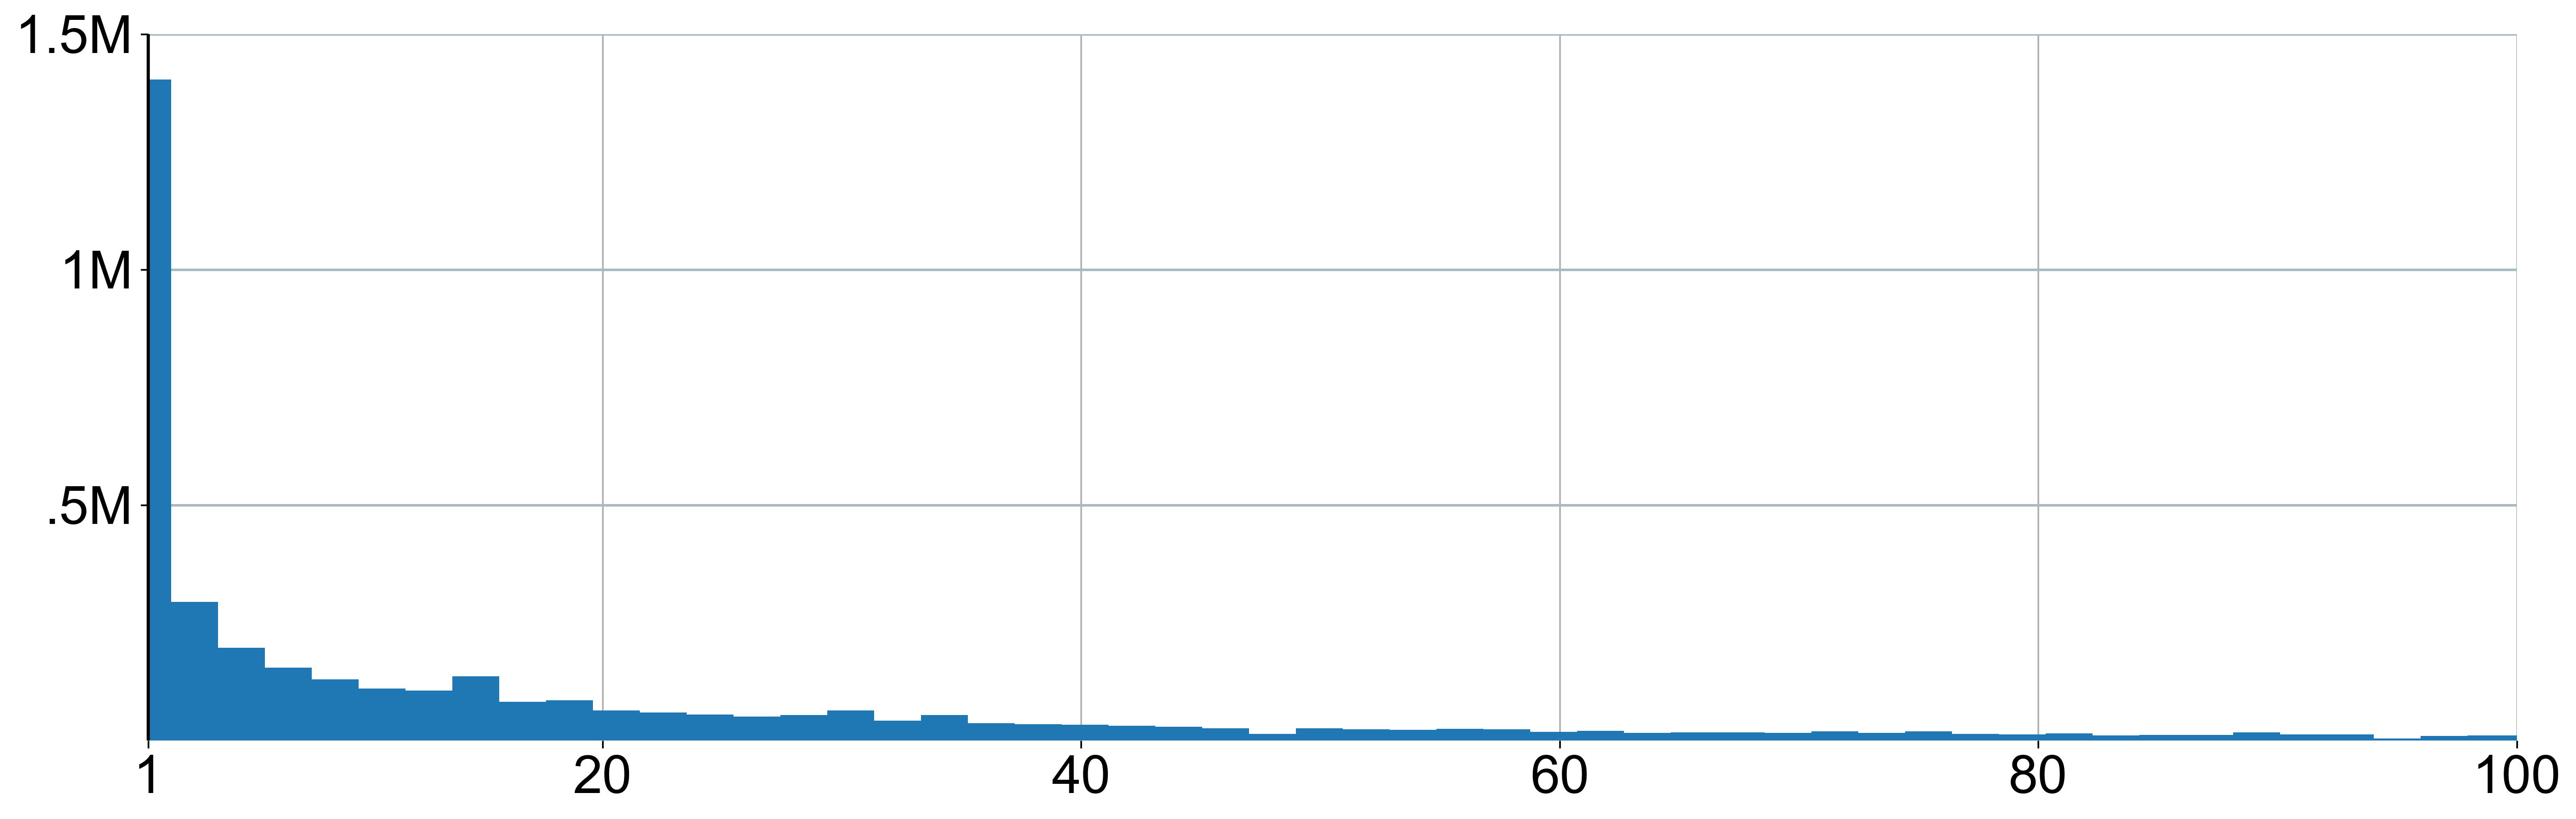

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,6), dpi = 300)
# Assuming df_binded is your DataFrame
df_binded['flank_size'].hist(bins=1000)
# Set the x-axis limit to show only 0 to 750
plt.xlim(1, 100)
ax.set_ylim((0,1))
ax.yaxis.set_ticks([x*10000 for x in [50,100,150]])
ax.yaxis.set_ticklabels(['.5M', '1M', '1.5M'], size=25, fontfamily="Arial", fontweight=100)
ax.xaxis.set_ticks([1,20,40,60,80,100])
ax.xaxis.set_ticklabels([1,20,40,60,80,100], size=25, fontfamily="Arial", fontweight=100)
# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_axisbelow(True)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
plt.yticks(fontsize = 25)
# Display the plot
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/database/hist_flank_size.svg', bbox_inches='tight')
plt.show()

In [ ]:
name_list = ['AACR','COSMIC','CLINVAR']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

for x in [0,1,2]:
    name = name_list[x]
    for fs in [1,5,11,21]:
        df = df_binded[df_binded['Database']==name].reset_index(drop=True)
        df = df[(df['flank_size'] >= fs) or (df['flank_size'] >= 0)] 
        list_of_n.append(name)
        list_of_fs.append(fs)
        l_1 = len(df['index'].unique())
        df_sub = df[df['status']==True]
        l_2 = len(df_sub['index'].unique())
        print(f'{name} with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df[df['class']==0]['index'].unique()))
        list_of_class_1.append(len(df[df['class']==1]['index'].unique()))
        list_of_class_2.append(len(df[df['class']==2]['index'].unique()))
        list_of_class_3.append(len(df[df['class']==3]['index'].unique()))

In [52]:
name_list = ['AACR','COSMIC','CLINVAR']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

for x in [0,1,2]:
    name = name_list[x]
    df = df_binded[df_binded['Database']==name].reset_index(drop=True)
    l_1 = len(df['ID_human'].unique())
    for fs in [0,2,4,10,20,30,40,50,100,200,500,1000]:
        df = df[df['flank_size'] >= fs] 
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[df['status']==True]
        l_2 = len(df_sub['ID_human'].unique())
        print(f'{name} with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df[df['class']==0]['ID_human'].unique()))
        list_of_class_1.append(len(df[df['class']==1]['ID_human'].unique()))
        list_of_class_2.append(len(df[df['class']==2]['ID_human'].unique()))
        list_of_class_3.append(len(df[df['class']==3]['ID_human'].unique()))

AACR with 1: 656168 out of 803974 (81.62%) mutations can be modeled.

AACR with 5: 569309 out of 803974 (70.81%) mutations can be modeled.

AACR with 11: 491026 out of 803974 (61.07%) mutations can be modeled.

AACR with 21: 403953 out of 803974 (50.24%) mutations can be modeled.

COSMIC with 1: 834682 out of 1044671 (79.90%) mutations can be modeled.

COSMIC with 5: 707170 out of 1044671 (67.69%) mutations can be modeled.

COSMIC with 11: 639560 out of 1044671 (61.22%) mutations can be modeled.

COSMIC with 21: 507215 out of 1044671 (48.55%) mutations can be modeled.

CLINVAR with 1: 1506299 out of 2038473 (73.89%) mutations can be modeled.

CLINVAR with 5: 1198748 out of 2038473 (58.81%) mutations can be modeled.

CLINVAR with 11: 973006 out of 2038473 (47.73%) mutations can be modeled.

CLINVAR with 21: 742799 out of 2038473 (36.44%) mutations can be modeled.



In [68]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']

In [69]:
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,AACR,1,803974,656168,537651,31913,86915,0
1,AACR,5,803974,569309,478084,27402,63953,0
2,AACR,11,803974,491026,415992,23561,51537,0
3,AACR,21,803974,403953,344597,19107,40282,0
4,COSMIC,1,1044671,834682,692349,52114,90869,0
5,COSMIC,5,1044671,707170,639845,46937,20680,0
6,COSMIC,11,1044671,639560,587041,43216,9494,0
7,COSMIC,21,1044671,507215,466917,35535,4851,0
8,CLINVAR,1,2038473,1506299,1209054,71314,226858,0
9,CLINVAR,5,2038473,1198748,1034049,58723,106341,0


In [62]:
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/fs_stat',index=False)